# The obj of this notebook is resuse the DNN (instead of CNN) to classify the GTRSB dataset

## Import lib 

In [10]:
import numpy as np
import tensorflow as tf
#import pandas as pd
import h5py
from tensorflow import keras
import matplotlib.pyplot as plt
import os, sys
sys.path.append('..') # important to import your own libraries from your workspace
import fidle.libfile as libfile
import fidle.pwk as pwk
print('finished')

finished


# 2 Load the data

def  rescal(data):
    # tak scale% randomly from data:
    img_subset_index=random.randint(len(data)-1, size=(sacle*len(data)))
    
    
    return [data[img] for img_indx in img_subset_index]# STEP 01: RETREIVE THE DATA, and show some of it:

In [11]:
filename = '/home/nadourh/Dropbox/PhD_/programming/Initiation_au_Deep_Learning/fidle/GTSRB/data/data-RGB-HE-24x24.h5'
#filename2 = '/home/nadourh/Dropbox/PhD_/programming/Initiation_au_Deep_Learning/fidle/GTSRB/data/set-24x24-L.h5'

with h5py.File(filename,"r") as f:
    x_train = f['x_train'][:]
    y_train = f['y_train'][:]
    x_test = f['x_test'][:]
    y_test = f['y_test'][:]
    x_meta = f['x_meta'][:]
    y_meta = f['y_meta'][:]
#     x_meta = f['x_meta'][:]
#     y_meta = f['y_meta'][:]


print('x_train.shape =', x_train.shape)
print('y_train.shape =', y_train.shape)
print('x_test.shape =', x_test.shape)
print('y_test.shape =', y_test.shape)
print('x_meta.shape =', x_meta.shape)
print('y_meta.shape =', y_meta.shape)

print('\nfinished...')
 
print(y_train[0])

x_train.shape = (39209, 24, 24, 3)
y_train.shape = (39209,)
x_test.shape = (12630, 24, 24, 3)
y_test.shape = (12630,)
x_meta.shape = (43, 24, 24, 3)
y_meta.shape = (43,)

finished...
20


In [12]:
print(y_test[1])

1


## Rescale it 

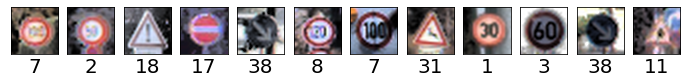

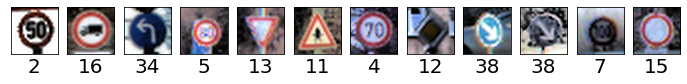

x_train.shape = (3920, 24, 24, 3)
y_train.shape = (3920,)
x_test.shape = (1263, 24, 24, 3)
y_test.shape = (1263,)


In [13]:
def  rescale_rand(x_data,y_data,scale=0.2):
    
    # tak scale% randomly from data:
    size = int(scale*len(x_data))
    samples=np.random.randint(len(x_data)-1, size=size)
    return np.array([x_data[i] for i in samples]) , np.array([y_data[i] for i in samples])
    #return data[:size]

##-----------------    dot it
scale = .1

x_train, y_train = rescale_rand(x_train,y_train,scale)
x_test, y_test = rescale_rand(x_test,y_test,scale)


## ----  show it :

pwk.plot_images(x_train, y_train, range(12), columns=12, x_size=1, y_size=1, 
                    colorbar=False, y_pred=None, cm='binary')
pwk.plot_images(x_test, y_test, range(12), columns=12, x_size=1, y_size=1, 
                    colorbar=False, y_pred=None, cm='binary')

# shape:
print('x_train.shape =', x_train.shape)
print('y_train.shape =', y_train.shape)
print('x_test.shape =', x_test.shape)
print('y_test.shape =', y_test.shape)


# STEP 2 Data Normalisation:

In [14]:
xmax = x_train.max()
print(xmax)
# already normolized

1.0


#  STEP 3: build a model:

In [23]:
(lx,ly,lz) = x_train.shape[1:]
def get_medel(lx,ly,lz):

    model = keras.models.Sequential()

    model.add( keras.layers.Input((lx,ly,lz),name='Input') )
    model.add( keras.layers.Conv2D(96, (3,3), activation='relu', name='Conv2D_1') )
    model.add( keras.layers.MaxPooling2D((2, 2), name='MaxPooling2D_1') )
    model.add( keras.layers.Dropout(0.2,name='Dropout_1'))

    model.add( keras.layers.Conv2D(192, (3, 3), activation='relu', name='Conv2D_2') )
    model.add( keras.layers.MaxPooling2D((2, 2), name='MaxPooling2D_2')  )
    model.add( keras.layers.Dropout(0.2, name='Dropout_2'))

    model.add( keras.layers.Flatten(name='Flatten_1')) 
    model.add( keras.layers.Dense(1500, activation='relu', name='Dense_1') )
    model.add( keras.layers.Dropout(0.5, name='Dropout_DNN_1'))

    model.add( keras.layers.Dense(43, activation='softmax', name='Output') )

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    sumery = model.summary()
    
    return model

model = get_medel(lx,ly,lz)

# model2 = get_medel(lx,ly,lz)
# model2.set_weights(model.get_weights()) 

print('finished ...')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 22, 22, 96)        2688      
_________________________________________________________________
MaxPooling2D_1 (MaxPooling2D (None, 11, 11, 96)        0         
_________________________________________________________________
Dropout_1 (Dropout)          (None, 11, 11, 96)        0         
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 9, 9, 192)         166080    
_________________________________________________________________
MaxPooling2D_2 (MaxPooling2D (None, 4, 4, 192)         0         
_________________________________________________________________
Dropout_2 (Dropout)          (None, 4, 4, 192)         0         
_________________________________________________________________
Flatten_1 (Flatten)          (None, 3072)             

# 5 Step: call back:

In [24]:
## make direction:
workspace = !pwd
#!mkdir run_
run_dir = workspace[0] + "/run_"

# ---- callback tensorboard
log_dir =  run_dir + "/logs/"+ pwk.tag_now()
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= log_dir,histogram_freq=1)

# ---- callback modelecheckpoint: save best model
save_dir = run_dir + "/models/best-model.h5"
best_model_checkpoint= tf.keras.callbacks.ModelCheckpoint(filepath = save_dir, verbose = 0, monitor = 'accuracy', save_best_only= True)

# ----- callbacks modelcheckpoint, save each epoch model:

save_dir_ =run_dir + "/models/model-{epoch:04d}.h5"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = save_dir_, verbose=0)

## print:
print(f'To run tensorboard, use : \ntensorboard --logdir {run_dir}/logs')

To run tensorboard, use : 
tensorboard --logdir /home/nadourh/Dropbox/PhD_/programming/Initiation_au_Deep_Learning/fidle/GTSRB/run_/logs


# Step 4: train it

In [25]:
print('started...')
history = model.fit(x_train,y_train,batch_size=64,epochs=5,verbose=1,validation_data=(x_test,y_test),
                   callbacks = [tensorboard_callback, best_model_checkpoint, model_checkpoint])
print('finished...')

started...
Epoch 1/5
62/62 [==============================] - 6s 92ms/step - loss: 3.4232 - accuracy: 0.1090 - val_loss: 2.1947 - val_accuracy: 0.4196
Epoch 2/5
62/62 [==============================] - 6s 89ms/step - loss: 1.8103 - accuracy: 0.4854 - val_loss: 1.1662 - val_accuracy: 0.6437
Epoch 3/5
62/62 [==============================] - 5s 89ms/step - loss: 0.9242 - accuracy: 0.7095 - val_loss: 0.7505 - val_accuracy: 0.8021
Epoch 4/5
62/62 [==============================] - 5s 88ms/step - loss: 0.5870 - accuracy: 0.8121 - val_loss: 0.6230 - val_accuracy: 0.8147
Epoch 5/5
62/62 [==============================] - 6s 104ms/step - loss: 0.3831 - accuracy: 0.8753 - val_loss: 0.4992 - val_accuracy: 0.8614
finished...


In [69]:
score =  model.evaluate(x_test,y_test,verbose=1)
#score2 =  model2.evaluate(x_test,y_test,verbose=1)

40/40 [==============================] - 1s 27ms/step - loss: 3.7658 - accuracy: 0.0087


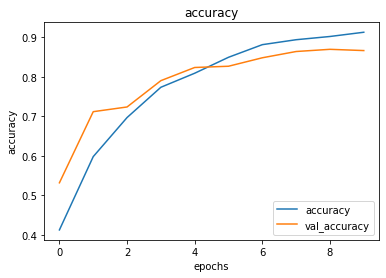

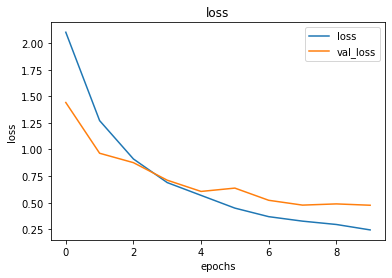

In [40]:
plt.plot(np.array(history.history['accuracy']))
plt.plot(np.array(history.history['val_accuracy']))
plt.legend(['accuracy','val_accuracy'],loc = 'lower right')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
##

plt.plot(np.array(history.history['loss']))
plt.plot(np.array(history.history['val_loss']))
plt.legend(['loss','val_loss'],loc = 'upper right')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# Load the madel and test it :

In [14]:
workspace = !pwd
save_dir = workspace[0] + "/run_/models/best-model.h5"

loaded_model = keras.models.load_model(save_dir)
print('Loaded...')

Loaded...


In [24]:
y_sigmoid = loaded_model.predict(x_test)
y_pred  = np.argmax(y_sigmoid, axis=-1)
print(y_pred)

[39 38  7 ...  9 22 18]


../fidle/libfile.py:50: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pred != 'None' and pred[img_index] != labels[img_index]:


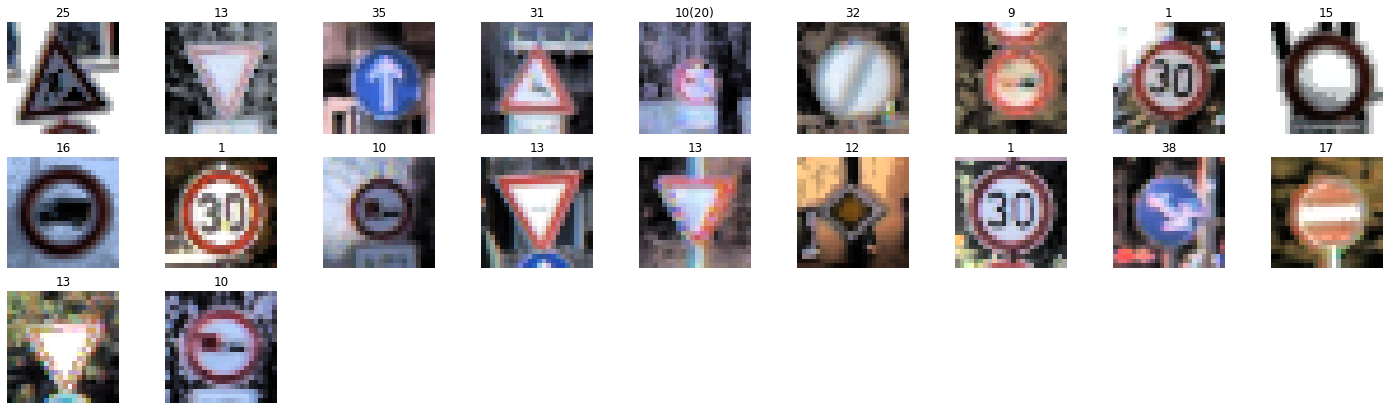

In [43]:
libfile.plot_images_rand(x_test,y_test,subset_im_numb=20,figsize=(25,7),pred=y_pred)

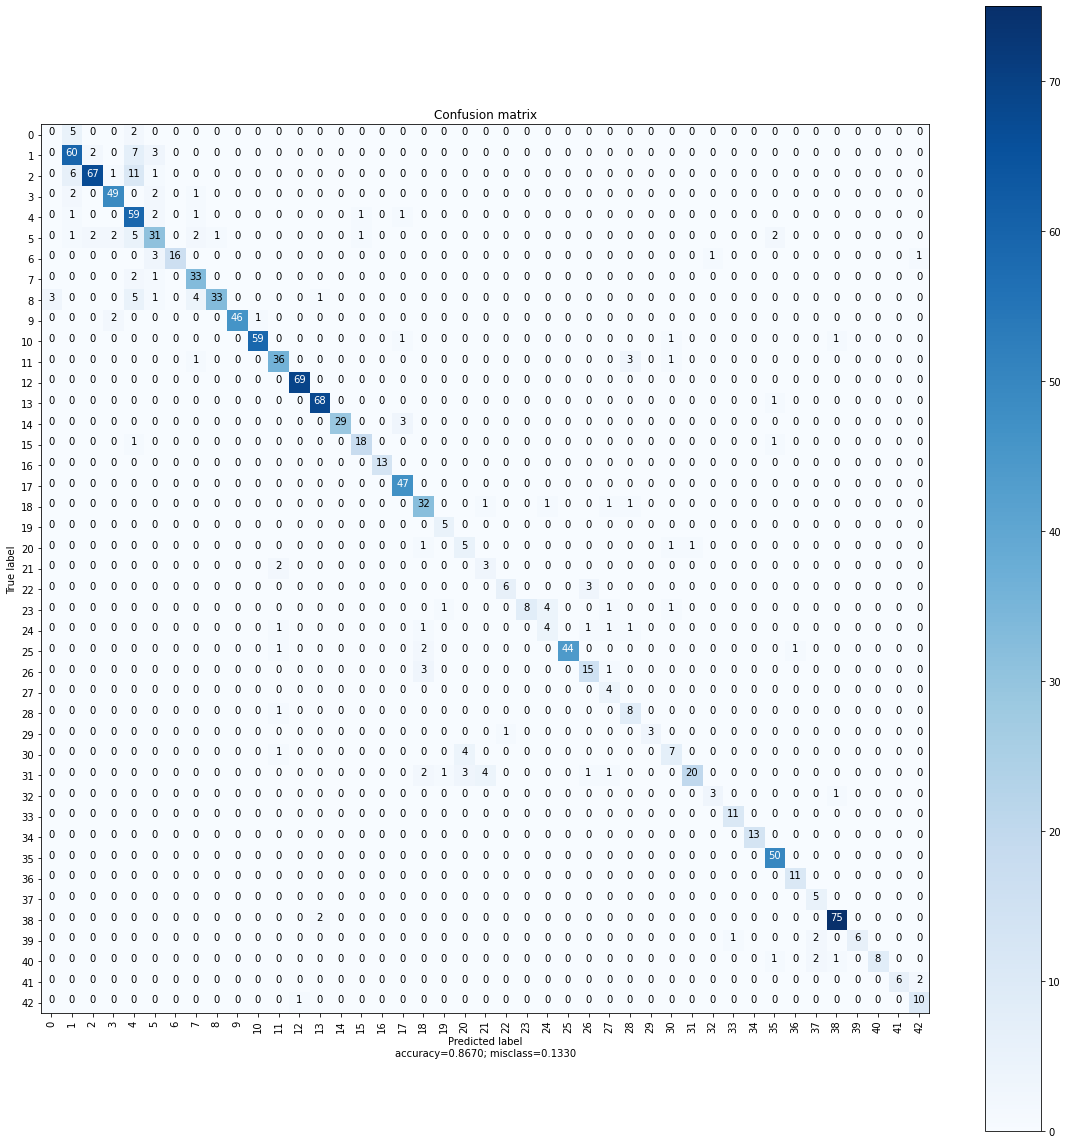

In [34]:
pwk.plot_confusion_matrix(y_test,y_pred,range(43), figsize=(16, 16),normalize=False, save_as='04-confusion-matrix')

# Make prediction:


Output layer from model is (x100) :

[[ 0.    0.    0.    0.    0.    0.    0.02  0.    0.    0.    0.   28.93  0.    0.    0.
   0.    0.    0.    0.01 41.37  0.09  3.76  0.    0.56  0.02  0.12  0.    0.09  0.    0.05
   0.05 24.84  0.    0.01  0.01  0.    0.    0.    0.02  0.    0.04  0.    0.  ]]

Graphically :



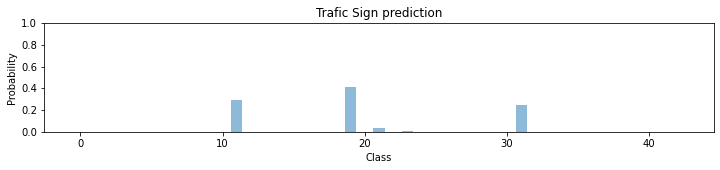


The image :               Prediction :            Real stuff:


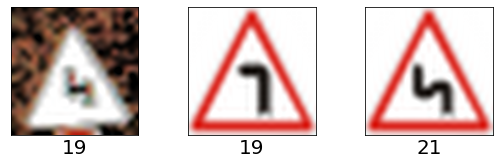

oups, that's wrong ;-(


In [133]:
# ---- Get a random image
#
i   = np.random.randint(1,len(x_test))
x,y = x_test[i], y_test[i]

# ---- Do prediction
#
predictions = loaded_model.predict( np.array([x]) )

# ---- A prediction is just the output layer
#
print("\nOutput layer from model is (x100) :\n")
with np.printoptions(precision=2, suppress=True, linewidth=95):
    print(predictions*100)

#---- Graphic visualisation

print("\nGraphically :\n")
plt.figure(figsize=(12,2))
plt.bar(range(43), predictions[0], align='center', alpha=0.5)
plt.ylabel('Probability')
plt.ylim((0,1))
plt.xlabel('Class')
plt.title('Trafic Sign prediction')
pwk.save_fig('05-prediction-proba')
plt.show()

# ---- Predict class
#
p = np.argmax(predictions)
p_index = np.where(y_meta==p)
p_index =p_index[0][0]

y_index = np.where(y_meta==y)
y_index  =y_index [0][0]
# ---- Show result
#
print("\nThe image :               Prediction :            Real stuff:")
pwk.plot_images( [x, x_meta[p_index], x_meta[y_index] ],  [p,p,y] , range(3),  columns=3,  x_size=3, y_size=2, save_as='06-prediction-images')

if p==y:
    print("YEEES ! that's right!")
else:
    print("oups, that's wrong ;-(")

34


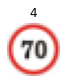

In [69]:

print(p_index)

libfile.plot_images_rand(np.array([x_meta[p_index],x]),[y],subset_im_numb=1,figsize=(10,10))

#?y_meta

In [36]:
?np.printoptions

Signature: np.printoptions(*args, **kwargs)
Docstring:
Context manager for setting print options.

Set print options for the scope of the `with` block, and restore the old
options at the end. See `set_printoptions` for the full description of
available options.

Examples
--------

>>> from numpy.testing import assert_equal
>>> with np.printoptions(precision=2):
...     np.array([2.0]) / 3
array([0.67])

The `as`-clause of the `with`-statement gives the current print options:

>>> with np.printoptions(precision=2) as opts:
...      assert_equal(opts, np.get_printoptions())

See Also
--------
set_printoptions, get_printoptions
File:      ~/anaconda3/envs/fidle/lib/python3.8/site-packages/numpy/core/arrayprint.py
Type:      function


In [ ]:
#pwk.end()